# Рынок заведений общественного питания Москвы

## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Инструкция по выполнению проекта

### Шаг №1. Загрузите данные и подготовьте их к анализу

Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.

Путь к файлу: /datasets/rest_data.csv

### Шаг №2. Анализ данных

 - Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
 - Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
 - Для какого вида объекта общественного питания характерно сетевое распространение?
 - Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
 - Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
 - Выделите в отдельный столбец информацию об улице из столбца address .
 - Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
 - Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
 - Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
 
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

### Шаг №3. Подготовка презентации

Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке

## Описание данных

Таблица rest_data:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import seaborn as sns
from io import BytesIO
import requests

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Чтобы избежать дубликатов, переведём названия всех объектов в нижний регистр:

In [5]:
df['object_name']=df['object_name'].str.lower()

In [6]:
df['chain'] = df['chain'].replace({'да':1,'нет':0})
df['chain'] = df['chain'].astype('bool')

In [7]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Проверим дубликаты:

In [8]:
df.duplicated().sum()

0

In [9]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Можно заменить некоторые названия объектов на более короткие:

In [10]:
df['object_type'] = df['object_type'].replace({'предприятие быстрого обслуживания': 
                                               'фастфуд', 'магазин (отдел кулинарии)': 'отдел кулинарии'})

In [11]:
len(df)

15366

In [12]:
df['object_name']=df['object_name'].replace(regex=["ресторан ", "кафе ", "пиццерия ", 'кофейня ', '«', '»'], value='')

In [13]:
df['object_name']=df['object_name'].replace({'сабвей': 'subway', 
                                             'старбакс': 'starbucks', 'pizza express': 'пицца экспресс', 
                                             'baskin robbins': 'баскин роббинс', 'pizza hut': 'пицца хат', 
                                             'кофикс': 'cofix', 'dominos pizza': "домино'с пицца", 'mcdonalds': 'макдоналдс', 
                                             'бургер кинг': 'burger king', 'il patio': 'иль патио', 'prime star': 'прайм стар',
                                             'коста кофе': 'costa coffee'})

In [14]:
len(df)

15366

In [15]:
df.head(20)

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,False,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,буфет мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Пропусков нет, полных дубликатов в данных тоже нет

В данных есть строки, в которых совпадает всё кроме id. Вероятная причина их появления - данные собраны из разных источников.Удалим такие дубликаты.

In [16]:
df.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

In [17]:
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

85

In [18]:
df = df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

In [19]:
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

0

In [20]:
len(df)

15281

**Вывод:**
В этом разделе была проведена предобработка, а именно:
- подгружен датафрейм;
- перевели все в нижний регистр для удобства работы с данными;
- заменили некоторые названия на более короткие;
- проверили наличие дубликатов. Вероятное появление таких дубликатов связано с тем что данные собраны с нескольких источников. Удалили такие дубликаты

## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Посмотрим на количество заведений каждого типа и посчитаем их долю от общего количества заведений:

In [21]:
types = df.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
types

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,фастфуд,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,отдел кулинарии,273


In [22]:
types['share'] = types['id']/(types['id'].sum())
types

,object_type,id,share
0,кафе,6071,0.397291
1,столовая,2584,0.169099
2,ресторан,2282,0.149336
3,фастфуд,1897,0.124141
4,бар,855,0.055952
5,буфет,576,0.037694
6,кафетерий,395,0.025849
7,закусочная,348,0.022773
8,отдел кулинарии,273,0.017865


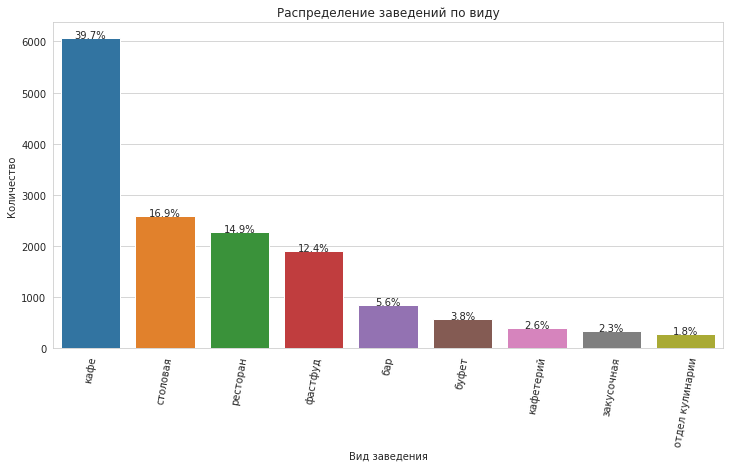

In [23]:
sns.set_style("whitegrid") 

plt.figure(figsize=(12,6))
graph = sns.barplot(data = types, x = 'object_type', y = 'id')

percentage = types['share']

patches = graph.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.07
   graph.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center')
plt.xticks(rotation=80)
plt.title("Распределение заведений по виду")
plt.xlabel('Вид заведения')
plt.ylabel('Количество')
plt.show()

 **Вывод**:
 Из всех видов общепита в Москве наиболее популярным видом является кафе, 39,7% от общего объема. Далее с большим отрывом идут столовая (16,9%), ресторан (14,9%) и фастфуд (12,4%). На остальные виды приходится менее чем по 1000 заведений

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [24]:
total_cnt = len(df)
total_cnt

15281

In [25]:
chain_cnt = df['chain'].sum()
chain_cnt

2964

In [26]:
single_cnt = total_cnt - chain_cnt
single_cnt

12317

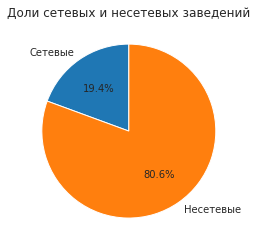

In [27]:
labels = 'Сетевые', 'Несетевые'
chain = [chain_cnt, single_cnt]

fig1, ax1 = plt.subplots()
ax1.pie(chain, labels=labels, autopct='%1.1f%%',shadow=False,
         startangle=90)
plt.title("Доли сетевых и несетевых заведений")
plt.show()

В Москве 19,4% сетевых заведений и 80,6% - несетевых

### Для какого вида объекта общественного питания характерно сетевое распространение?

Найдем долю сетевых заведений для каждого типа:

In [28]:
chain_type = df.groupby('object_type')['chain'].mean().sort_values(ascending=False).reset_index()
chain_type['chain'] = chain_type['chain'].round(3)
chain_type

,object_type,chain
0,фастфуд,0.415
1,отдел кулинарии,0.286
2,ресторан,0.238
3,кафе,0.230
4,закусочная,0.161
5,кафетерий,0.132
6,бар,0.043
7,буфет,0.019
8,столовая,0.001


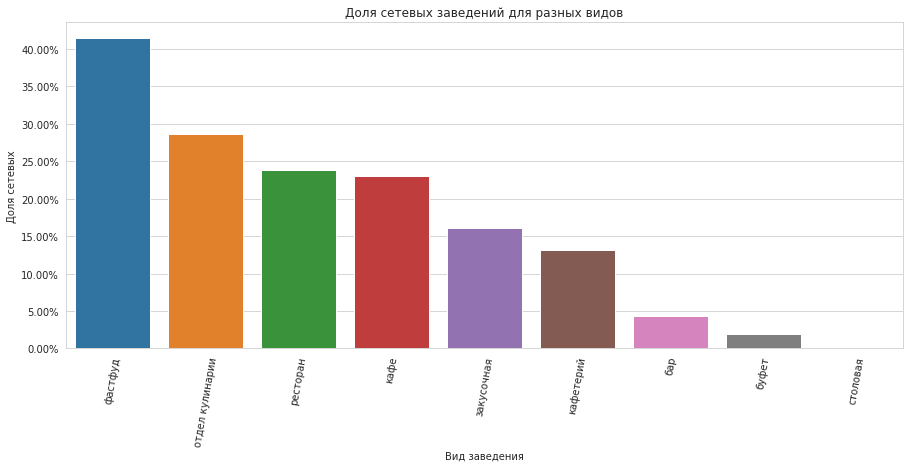

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))

graph = sns.barplot(data = chain_type, x='object_type', y='chain')
type(graph)
vals = graph.get_yticks()
graph.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.xticks(rotation=80)
plt.title("Доля сетевых заведений для разных видов")
plt.xlabel('Вид заведения')
plt.ylabel('Доля сетевых')
plt.show()

Сетевыми заведениями в большинстве своём являются фастфуды ~ 41%, за ними идут отдел кулинарии и рестораны, 28% и 24%

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [30]:
chain_seats = df[df['chain']==True].groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index()
chain_seats.sort_values(by='id',ascending=False).head(20)

,object_name,id,number
440,шоколадница,183,57.814208
26,kfc,170,55.070588
247,макдоналдс,164,89.036585
7,burger king,144,46.923611
395,теремок,105,26.638095
163,домино'с пицца,97,18.113402
228,крошка картошка,92,21.782609
379,суши wok,74,6.837838
257,милти,72,1.333333
286,папа джонс,65,22.307692


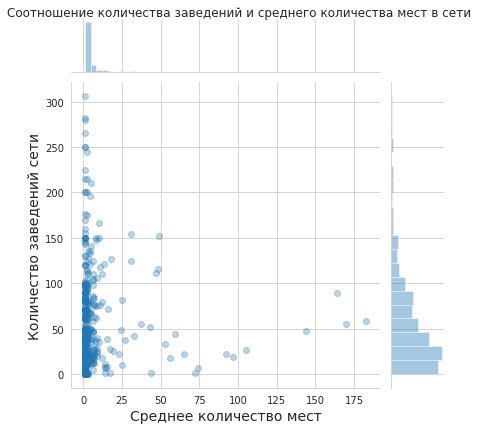

In [31]:
sns.set_style("whitegrid")
ax=sns.jointplot(x='id', y='number', data=chain_seats, alpha=0.3);
ax.set_axis_labels('Среднее количество мест', 'Количество заведений сети', fontsize=14)
ax.fig.suptitle("Соотношение количества заведений и среднего количества мест в сети")
ax.fig.subplots_adjust(top=0.95)
plt.show()

Для заведений которые могут характеризовать себя как сетевые наиболее характерное количество мест от 1 до 50

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Посмотрим, какой вид заведений в среднем имеет наибольшее количество посадочных мест

In [32]:
avg_seats = df.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
avg_seats

,object_type,number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703
5,фастфуд,20.808645
6,кафетерий,9.184810
7,закусочная,7.847701
8,отдел кулинарии,5.589744


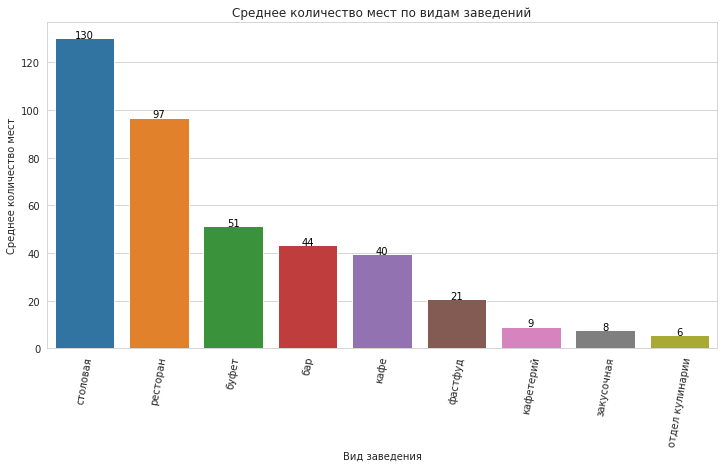

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="object_type", y="number", data=avg_seats)
plt.title("Среднее количество мест по видам заведений")
plt.xlabel('Вид заведения')
plt.ylabel('Среднее количество мест')
plt.xticks(rotation=80)
for index, row in avg_seats.iterrows():
    ax.text(row.name,row.number, round(row.number), color='black', ha="center")
plt.show()

Наибольшее количество посадочных мест у нас в столовых и ресторанах (130 и 97), за ними с большим отрывом идут буфеты, бары и кафе (51, 44, 40 соответственно). Похоже на правду, столовые обычно располагаются на рабочих предприятиях и университетах, где нужно за обеденное время обслужить большое количество человек, рестораны же часто имеют отдельные залы для празднования свадеб, корпоративов и других мероприятий.

### Выделите в отдельный столбец информацию об улице из столбца address

In [34]:
df['address'].head(10)

0           город Москва, улица Егора Абакумова, дом 9
1    город Москва, улица Талалихина, дом 2/1, корпус 1
2            город Москва, Абельмановская улица, дом 6
3              город Москва, Абрамцевская улица, дом 1
4    город Москва, Абрамцевская улица, дом 9, корпус 1
5    город Москва, Абрамцевская улица, дом 15, корп...
6        город Москва, переулок Сивцев Вражек, дом 6/2
7    город Москва, Авиамоторная улица, дом 8, строе...
8    город Москва, Авиамоторная улица, дом 8, строе...
9    город Москва, Авиамоторная улица, дом 8, строе...
Name: address, dtype: object

In [35]:
def split_address(x):
    return x.split(', дом')[0]

df['street'] = df['address'].apply(lambda x : split_address(x))
df['street'] = df['street'].replace(regex=["город Москва, "], value='')
df['street'].head(10)

0     улица Егора Абакумова
1          улица Талалихина
2      Абельмановская улица
3        Абрамцевская улица
4        Абрамцевская улица
5        Абрамцевская улица
6    переулок Сивцев Вражек
7        Авиамоторная улица
8        Авиамоторная улица
9        Авиамоторная улица
Name: street, dtype: object

В колонке street получили улицы Москвы. Для населенных пунктов, включенных в Москву (Зеленоград и пр.), также указано название населенного пункта - таким образом при наличии улиц с одинаковыми названиями, мы сможем их различить

In [36]:
df_failed_address = df.query('(street.str.contains(","))', engine='python')
df_failed_address.head(50)

,id,object_name,chain,object_type,address,number,street
145,24606,радэа,False,кафе,"город Москва, Нахимовский проспект, владение 75А",7,"Нахимовский проспект, владение 75А"
741,151319,галерея,False,кафе,"город Москва, Нагорная улица, владение 25, стр...",150,"Нагорная улица, владение 25, строение 1"
856,25558,му-му,True,кафе,"город Москва, 9-я Парковая улица, владение 61А...",200,"9-я Парковая улица, владение 61А, строение 1"
1386,22331,столовая миэт,False,столовая,"город Москва, город Зеленоград, улица Юности, ...",56,"город Зеленоград, улица Юности"
1405,20199,это,False,кафе,"город Москва, город Зеленоград, корпус 401",35,"город Зеленоград, корпус 401"
1406,68113,френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34,"город Зеленоград, корпус 435"
1407,20105,граф монте-кристо,False,кафе,"город Москва, город Зеленоград, корпус 436",40,"город Зеленоград, корпус 436"
1408,22982,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49,"город Зеленоград, корпус 438"
1409,151267,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",45,"город Зеленоград, корпус 438"
1410,150537,вечный зов,False,кафе,"город Москва, город Зеленоград, корпус 834А",30,"город Зеленоград, корпус 834А"


In [37]:
len(df_failed_address)/len(df)

0.07309731038544598

Четко выделить улицу не удалось примерно в 7,5% записей.
Большинство из этих адресов расположены в городах и поселениях за пределами непосредственно Москвы (Зеленоград и пр.). Некоторые адреса не подпадают под общий шаблон, например "улица Мичуринский Проспект, Олимпийская Деревня", в некоторых записях улица не указана (напр. "поселение Краснопахорское, село Красная Пахра").

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Теперь выделим топ-10 улиц по количеству заведений

In [38]:
top_streets = df.groupby('street')['id'].count().sort_values(ascending = False).reset_index().head(10)
top_streets

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,155
5,Ленинский проспект,147
6,проспект Вернадского,127
7,Кутузовский проспект,114
8,Каширское шоссе,103
9,Ходынский бульвар,102


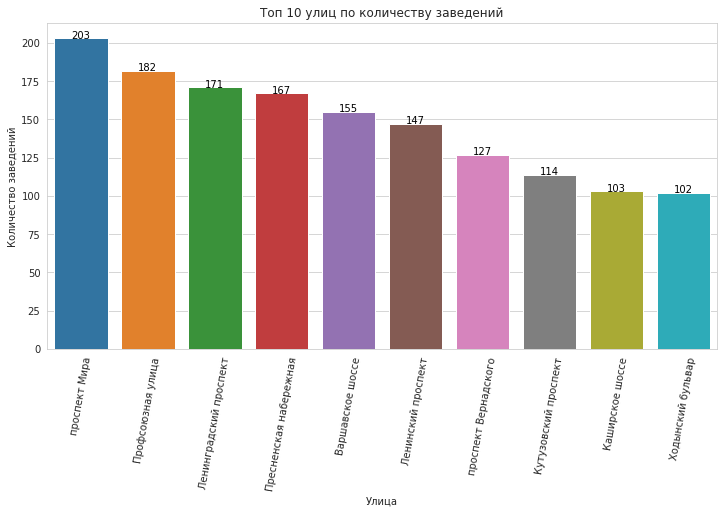

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="street", y="id", data=top_streets)
plt.title("Топ 10 улиц по количеству заведений")
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.xticks(rotation=80)
for index, row in top_streets.iterrows():
    ax.text(row.name,row.id, row.id, color='black', ha="center")
plt.show()

Импортируем данные о районах (источник - данные Мосгаз), чтобы узнать, в каких районах находятся улицы.

https://docs.google.com/spreadsheets/d/1LhhYh5DfmddEDYDERolchChiS1T9Lgdw7OhVG7q3cKA/edit?usp=sharing

In [40]:
spreadsheet_id = '1LhhYh5DfmddEDYDERolchChiS1T9Lgdw7OhVG7q3cKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.sample(10)

,streetname,areaid,okrug,area
3576,проезд Кирова,115,ЮВАО,Район Люблино
4165,Болотная улица,21,ЦАО,Район Якиманка
1019,2-я Хапиловская улица,36,ВАО,Район Соколиная Гора
536,Садовническая улица,14,ЦАО,Район Замоскворечье
150,Волочаевская улица,18,ЦАО,Таганский район
1579,Наро-Фоминская улица,46,ЗАО,Район Солнцево
1443,Лермонтовская площадь,13,ЦАО,Басманный район
4045,Серпуховская площадь,21,ЦАО,Район Якиманка
3451,3-й квартал Капотня,112,ЮВАО,Район Капотня
4386,Богословский переулок,17,ЦАО,Пресненский район


Создадим таблицу с районами Москвы:

In [41]:
df_area = df.merge(streets, how='left', left_on = 'street', right_on = 'streetname')
df_area

,id,object_name,chain,object_type,address,number,street,streetname,areaid,okrug,area
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Абельмановская улица,18.0,ЦАО,Таганский район
...,...,...,...,...,...,...,...,...,...,...,...
29559,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,улица Земляной Вал,13.0,ЦАО,Басманный район
29560,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,улица Земляной Вал,18.0,ЦАО,Таганский район
29561,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,улица Земляной Вал,13.0,ЦАО,Басманный район
29562,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36,"поселение Московский, Киевское шоссе, 22-й кил...",NaN,NaN,NaN,NaN


In [42]:
df_area.groupby('street')['area'].nunique().sort_values(ascending=False).head(10)

street
Ленинский проспект          8
Варшавское шоссе            8
Волгоградский проспект      7
проспект Мира               7
Дмитровское шоссе           7
Ленинградское шоссе         6
Севастопольский проспект    6
Профсоюзная улица           6
Нахимовский проспект        6
шоссе Энтузиастов           5
Name: area, dtype: int64

Из последней группировки видно что многие улицы проходят по нескольким районам сразу. Получим список районов, через которые проходят топ-10 улиц:

In [43]:
top_10_streets = top_streets['street']
df_area.query('street in @top_10_streets')['area'].unique()

array(['Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Район Дорогомилово',
       'Район Фили-Давыдково', 'Район Москворечье-Сабурово',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Аэропорт', 'Район Беговой', 'Хорошевский район',
       'Район Сокол', 'Обручевский район', 'Район Теплый Стан',
       'Район Якиманка', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район', 'Академический район',
       'Район Черемушки', 'Район Ясенево', 'Район Коньково',
       'Пресненский район'], dtype=object)

In [44]:
len(df_area.query('street in @top_10_streets')['area'].unique())

37

Топ-10 улиц проходят через 37 районов. Теперь выведем список районов для каждой улицы:

In [45]:
pd.options.display.max_colwidth = -1

In [46]:
df_area.query('street in @top_10_streets').groupby('street', as_index=False).agg({'area': set})

,street,area
0,Варшавское шоссе,"{Район Чертаново Южное, Район Чертаново Центральное, Нагорный район, Район Нагатино-Садовники, Район Южное Бутово, Донской район, Район Северное Бутово, Район Чертаново Северное}"
1,Каширское шоссе,"{Район Орехово-Борисово Южное, Район Нагатино-Садовники, Район Орехово-Борисово Северное, Район Москворечье-Сабурово}"
2,Кутузовский проспект,"{Район Фили-Давыдково, Район Дорогомилово}"
3,Ленинградский проспект,"{Район Аэропорт, Район Сокол, Район Беговой, Хорошевский район}"
4,Ленинский проспект,"{Обручевский район, Район Теплый Стан, Район Проспект Вернадского, Ломоносовский район, Район Якиманка, Донской район, Район Тропарево-Никулино, Район Гагаринский}"
5,Пресненская набережная,{Пресненский район}
6,Профсоюзная улица,"{Район Черемушки, Обручевский район, Район Теплый Стан, Район Коньково, Академический район, Район Ясенево}"
7,Ходынский бульвар,{Хорошевский район}
8,проспект Вернадского,"{Район Раменки, Район Проспект Вернадского, Ломоносовский район, Район Тропарево-Никулино, Район Гагаринский}"
9,проспект Мира,"{Мещанский район, Ярославский Район, Район Марьина роща, Алексеевский район, Район Ростокино, Останкинский район, Район Свиблово}"


И посмотрим в каком же районе находится наибольшее количество улиц с заведениями

In [47]:
top_areas = df_area.groupby('area')['street'].nunique().sort_values(ascending=False).reset_index().head(10)
top_areas

,area,street
0,Тверской район,106
1,Пресненский район,88
2,Таганский район,82
3,Басманный район,80
4,Район Хамовники,74
5,Даниловский район,49
6,Мещанский район,48
7,Район Замоскворечье,46
8,Район Арбат,45
9,Красносельский район,40


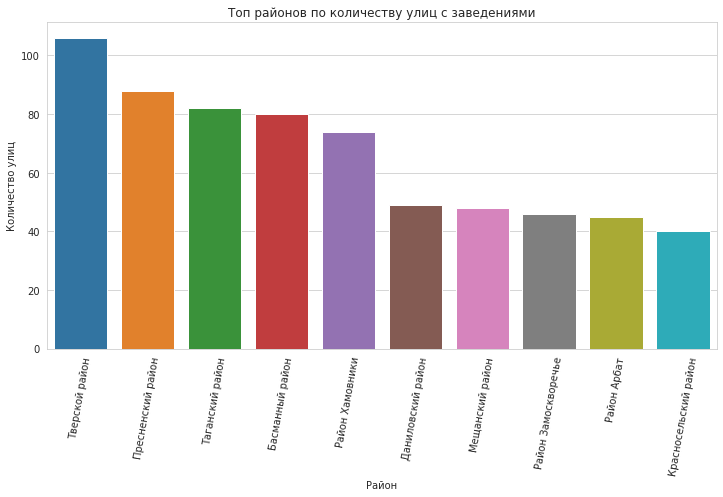

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="area", y="street", data=top_areas)
plt.title("Топ районов по количеству улиц с заведениями")
plt.xlabel('Район')
plt.ylabel('Количество улиц')
plt.xticks(rotation=80)

plt.show()

**Вывод**
Самым крупным районом по количеству улиц с заведениями является Тверской. В нем 106 улиц с заведениями. За ним располагаются Пресненский (88), Таганский (82), Басманный (80) и Хамовники (74)

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Оставим а датафрейме только Московские заведения

In [49]:
df_msk = df.query('~(address.str.contains("город Москва, город") or address.str.contains("город Москва, поселение"))',
                  engine='python')

In [50]:
len(df_msk)

14469

Теперь оставим только улицы с одним заведением

In [51]:
street_rest_num = df_msk.groupby('street')['id'].nunique().reset_index()
street_rest_num.head()

,street,id
0,1-й Автозаводский проезд,3
1,1-й Амбулаторный проезд,2
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1


In [52]:
lonely_cafe_streets = street_rest_num.query('id == 1')['street']
len(lonely_cafe_streets)

690

В Москве 689 улиц с одним заведением. Посмотрим в каких районах они находятся

In [53]:
df_msk_area = df_msk.merge(streets, how='left', left_on = 'street', right_on = 'streetname')
lonely_cafe_areas = df_msk_area.query('street in @lonely_cafe_streets').groupby('area')['id'].nunique().sort_values(ascending = False).reset_index()
len(lonely_cafe_areas)

101

Улицы с одним заведением встречаются в 101-м районе Москвы. Посмотрим, в каких районах больше всего улиц с одним заведением.

In [54]:
lonely_cafe_areas.columns = ['area', 'qty']
lonely_cafe_areas.head(10)

,area,qty
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,20
5,Район Арбат,18
6,Район Марьина роща,17
7,Мещанский район,15
8,Район Сокольники,15
9,Район Замоскворечье,14


Таганский район, район Хамовники и Басманный район лидируют по количеству улиц с одним заведением.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Выберем заведения, находящиеся на топ 10 улиц по количеству заведений

In [55]:
crowded_street_rests = df_msk.query('street in @top_10_streets')
crowded_street_rests.head(10)

,id,object_name,chain,object_type,address,number,street
151,155973,андерсон,True,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,True,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,ламаджо,False,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,False,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,False,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
156,26279,макдоналдс,True,кафе,"город Москва, Варшавское шоссе, дом 143А",70,Варшавское шоссе
165,141687,пироговая рогова,False,кафе,"город Москва, проспект Вернадского, дом 9/10",42,проспект Вернадского
166,148853,контдитерская кузина,False,кафе,"город Москва, проспект Вернадского, дом 11/19",5,проспект Вернадского
167,149149,суши wok,True,кафе,"город Москва, проспект Вернадского, дом 11/19",8,проспект Вернадского
168,128511,аморе,False,кафе,"город Москва, проспект Вернадского, дом 11/19",10,проспект Вернадского


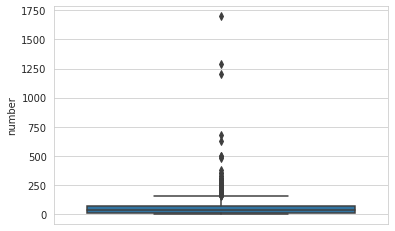

In [56]:
sns.set_style("whitegrid")
ax = sns.boxplot(y=crowded_street_rests["number"])

Уберем явные выбросы, оставим только заведения до 400 посадочных мест

In [57]:
crowded_street_rests = crowded_street_rests.query('number < 400')

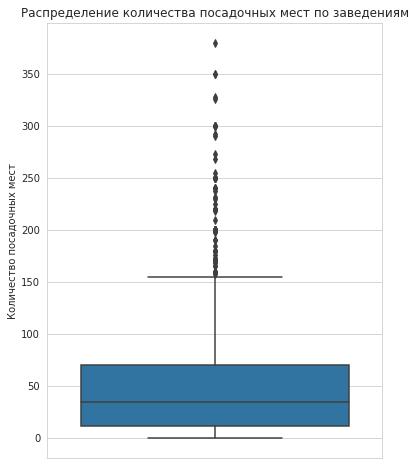

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ax = sns.boxplot(y=crowded_street_rests["number"])
plt.title("Распределение количества посадочных мест по заведениям")
plt.ylabel('Количество посадочных мест')
plt.show()

In [59]:
crowded_street_rests['number'].describe()

count    1463.00000
mean     51.37799  
std      57.52675  
min      0.00000   
25%      12.00000  
50%      35.00000  
75%      70.00000  
max      380.00000 
Name: number, dtype: float64

Медианное значение количества посадочных мест - 35.
В целом наиболее распространенный формат - от 12 до 70 посадочных мест.

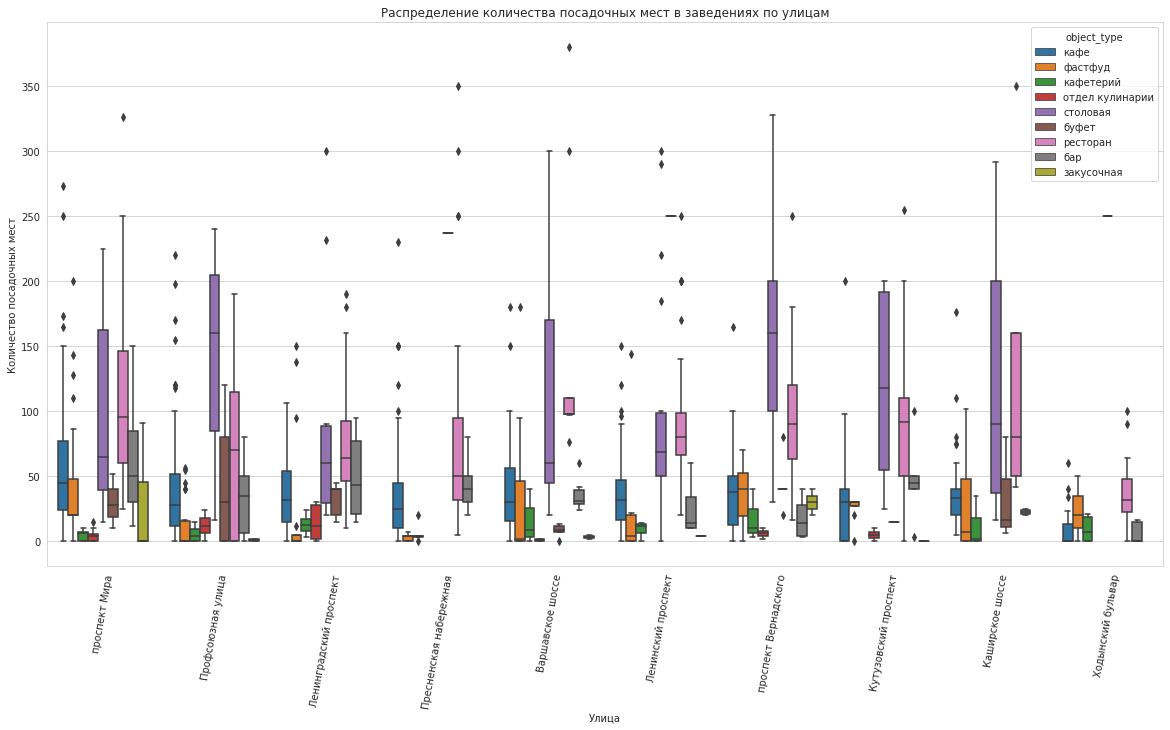

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = crowded_street_rests,  y="number", x = "street", hue = 'object_type', order = top_10_streets)
plt.xticks(rotation=80)
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.show()

Буфеты, закусочные, отделы кулинарии и кафетерии выглядят не очень перспективно: встречаются даже не на всех топовых улицах, а также количество мест в таких заведениях совсем небольшое. Посмотрим на распредение без этих видов заведений.

In [61]:
limit_rests= ['закусочная', 'буфет', 'магазин (отдел кулинарии)', 'кафетерий']
crowded_street_rests_2 = crowded_street_rests.query('object_type not in @limit_rests')

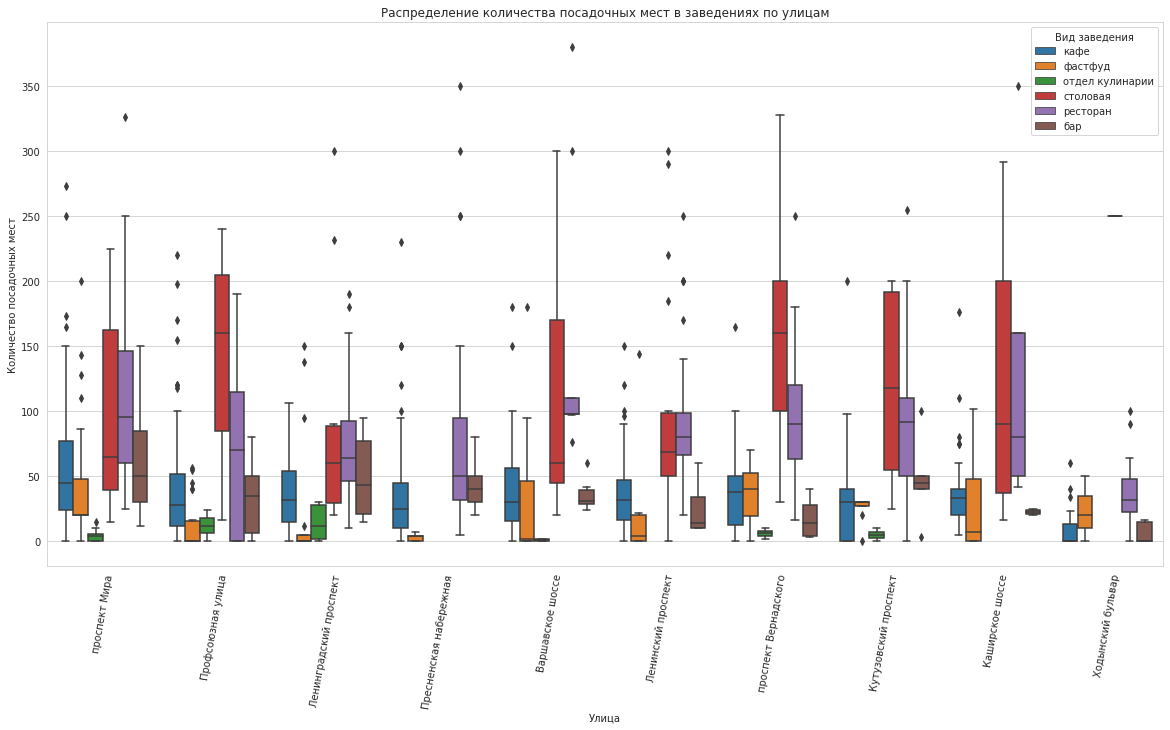

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = crowded_street_rests_2,  y="number", x = "street", hue = 'object_type', order = top_10_streets )
plt.xticks(rotation=80)
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.legend(title="Вид заведения")
plt.show()

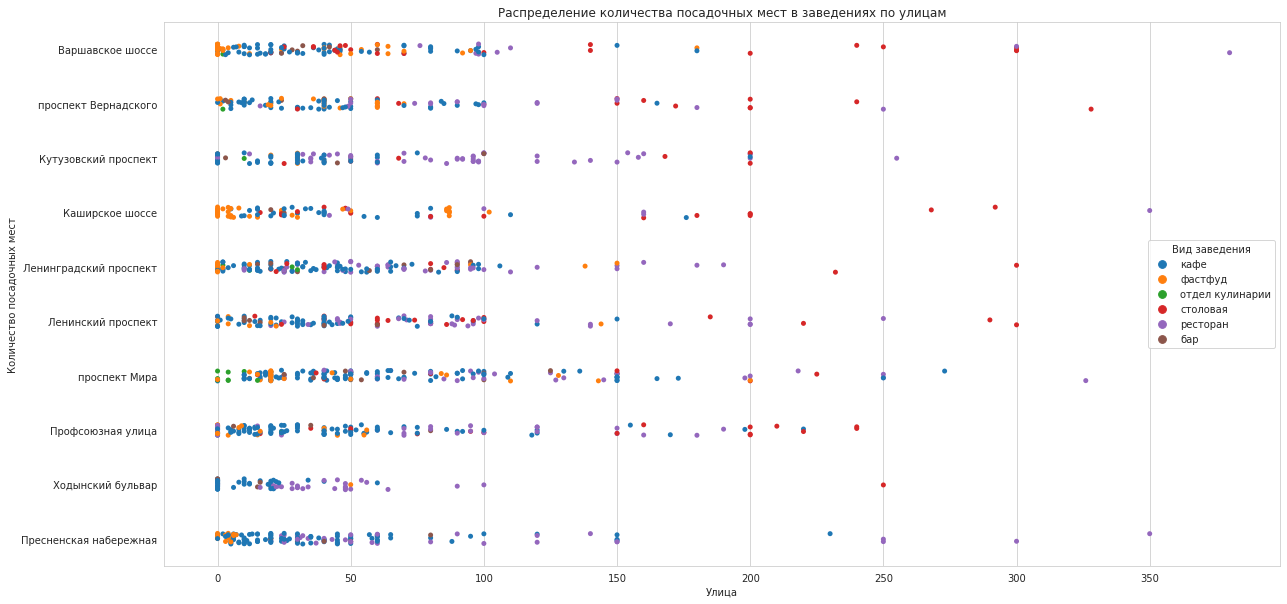

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.stripplot(data = crowded_street_rests_2,  y="street", x = "number", hue = 'object_type' )
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.legend(title="Вид заведения")
plt.show()

По количеству посадочных мест доминирую столовые и рестораны. У этих двух видов заведений сопоставимое количество мест, разве что на Кировоградской столовые особенно вместительны. В основном в них около 80 мест.
В кафе и барах обычно 30-40 мест. В предприятиях быстрого обслуживания - около 10.
Также можно отметить, что на Пресненской набережной заведения зачастую меньше, чем на крупных магистралях.

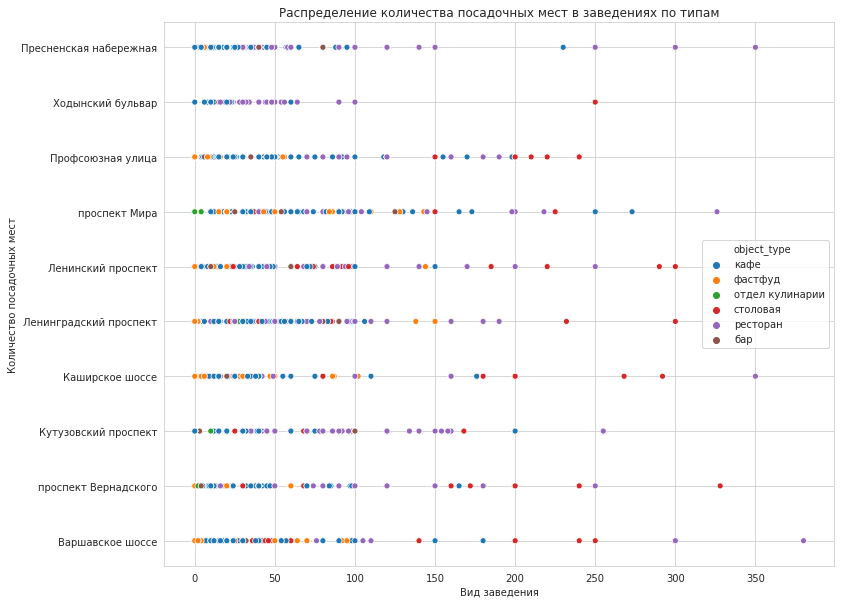

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
sns.scatterplot(data = crowded_street_rests_2, x = 'number', y = 'street', hue = 'object_type')
plt.title("Распределение количества посадочных мест в заведениях по типам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Вид заведения')
plt.show()

## Шаг №3. Выводы и подготовка презентации

Кафе является самым востребованным видом заведения - кафе составляют почти 40% от всех заведений.
В среднем больше всего посадочных мест в столовых (130), за ними следуют рестораны с 97 местами. В буфетах в среднем по 51 месту. В барах и ресторанах приблизительно по 40 мест.

В Москве преобладают несетевые заведения, таких 80%. Сетевые заведения чаще встречаются среди предприятий быстрого обслуживания (около 40%). Среди ресторанов и кафе около 23% являются сетевыми.

Топ 10 улиц по количеству заведений:

проспект Мира 204
Профсоюзная улица 183
Ленинградский проспект 172
Пресненская набережная 167
Варшавское шоссе 155
Ленинский проспект 147
проспект Вернадского 131
Кутузовский проспект 114
Каширское шоссе 103
Кировоградская улица 102
Улицы из топ-10 проходят 37 районов Москвы

Можно выделить Пресненский район: в нем находится одна из наиболее популярных улиц (Пресненская набережная), а также в целом сосредоточено большое количество улиц с заведениями. Другие районы с большим количеством улиц, на которых расположены заведения: Тверской район, Пресненский район, Таганский район, Басманный район.

В Москве также есть 689 улиц с одним заведением. Такие улицы встречаются в 101-м районе Москвы. Таганский район, район Хамовники и Басманный район лидируют по количеству улиц с одним заведением.

На улицах с наибольшим количеством заведений по количеству посадочных мест доминирую столовые и рестораны. У этих двух видов заведений сопоставимое количество мест, разве что на Кировоградской столовые особенно вместительны. В основном в них около 80 мест. В кафе и барах обычно 30-40 мест. В предприятиях быстрого обслуживания - около 10.

**Рекомендации по открытию нового заведения:** На основе проведённого анализа мои рекомендации по открытию нового заведения:
 - Во-первых, это должно быть кафе. Это самый популярный и востребованный тип заведения;
 - Во-вторых, район размещения - Пресненский. Элитный район в центре Москвы с хорошоразвитой инфраструктурой. Имеет большое количество музеев, театров, парков и зон отдыха. Это обеспечит хороший трафик;
 - В-третьих, с учетом типа заведения и района размещения, моя рекомендация по количеству мест - 30-40;
 - В-четвёртых, возможен ли сетевой формат? Для кафе сетевой формат не предусмотрен, но не исключен. Создание сети возможно в перспективе 

**Презентация:**
https://disk.yandex.ru/d/epgO3vBrH68Qyg